# SOK-1006 V25

## Forelesning 11 - Bedriftens inntekter og kostnader

### 2. Kostnader på kort sikt

Vi skal skrive kostnadsfunksjonen på kort sikt som en funksjon av hvor mange enheter bedriften produserer. På kort sikt er det minst én produksjonsfaktor som er fast.       

**Oppgave**      

En bedrift produserer goder med følgende produktfunksjon:


\begin{equation}
    x = f(N,K)=N^{0.5}K^{0.5}\tag{1}
\end{equation}

På kort sikt har bedriften tilgang til begrenset kapital $K_0=10$. Prisen per enhet kapital er fast $r=500$ NOK, mens én time med arbeidskraft koster $w=350$ NOK. På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. Bedriften leier et bygg til produksjonen av produktet, og dette koster 10 000 NOK (faste kostnader).      
a) Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(x, K_0)$. Tegn denne funksjon i en figur med produksjon på den horisontale aksen. Tegn også kostnadsfunksjonen som oppstår når kapitalbeholdningen økes til $K_1=50$. Kommenter dine funn.   
b) I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt. Kommenter og forklar forholdet mellom total og variabel gjennomsnittskostnad og grensekostnaden.       
c) Hvilke skalaegenskaper viser denne produktfunksjon?

In [51]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt



x, k, n = sp.symbols('x k n')

# Definerer funskjoner for produskjon og kostnad og deriverer dem 
def produksjon(n, k):
    return sp.sqrt(n * k)

n_expr = sp.solve(produksjon(n, k) - x, n)[0]


def kostnad(n, k):
    return 350 * n + 500 * k + 10000


C_expr = kostnad(n_expr, k)
C_expr = sp.simplify(C_expr)

# Bruker lambdify for å kunne plotte dem
C_fn = sp.lambdify((x, k), C_expr, modules='numpy')



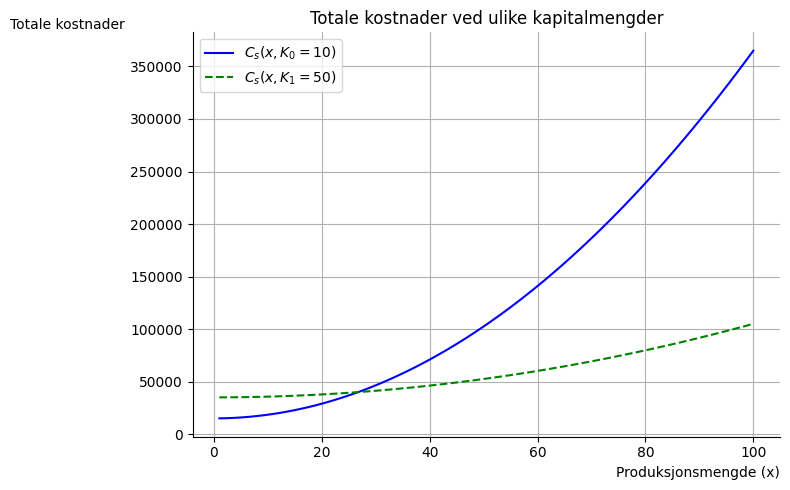

In [52]:
# definerer kostnadene
x_vals = np.linspace(1, 100, 100)
K0 = 10
K1 = 50


C_vals_K0 = C_fn(x_vals, K0)
C_vals_K1 = C_fn(x_vals, K1)

# Plotter oppgave a
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_vals, C_vals_K0, label=r'$C_s(x, K_0=10)$', color='blue')
ax.plot(x_vals, C_vals_K1, label=r'$C_s(x, K_1=50)$', color='green', linestyle='--')


ax.set_xlabel('Produksjonsmengde (x)', loc='right')
ax.set_ylabel('Totale kostnader', loc='top', rotation=0)
ax.set_title('Totale kostnader ved ulike kapitalmengder')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [53]:

# Definerer totale gjennomsnittskostnader(ATC), grenskosnader og variable(MC) gjennomsnittskosnatrer(AVC)
ATC_expr = sp.simplify(C_expr / x)
AVC_expr = sp.simplify((350 * x ) / k) 
MC_expr = sp.simplify(sp.diff(C_expr, x))
ATC_fn = sp.lambdify((x, k), ATC_expr, 'numpy')
AVC_fn = sp.lambdify((x, k), AVC_expr, 'numpy')
MC_fn  = sp.lambdify((x, k), MC_expr,  'numpy')



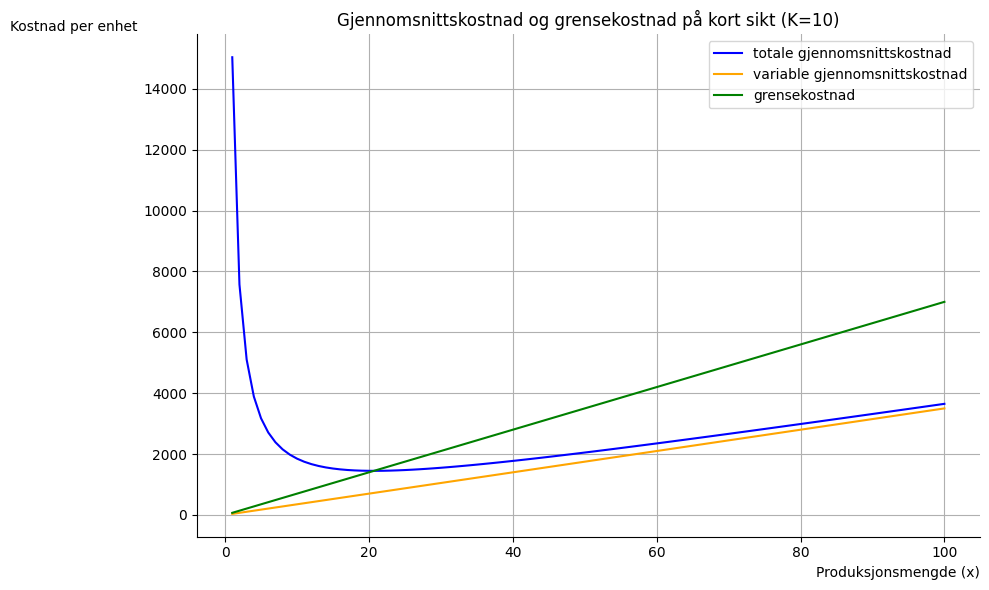

In [54]:

k_val = 10


ATC_vals = ATC_fn(x_vals, k_val)
AVC_vals = AVC_fn(x_vals, k_val)
MC_vals  = MC_fn(x_vals, k_val)

# plotter grafen for oppgave b
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_vals, ATC_vals, label='totale gjennomsnittskostnad', color='blue')
ax.plot(x_vals, AVC_vals, label='variable gjennomsnittskostnad', color='orange')
ax.plot(x_vals, MC_vals, label='grensekostnad', color='green')


ax.set_xlabel('Produksjonsmengde (x)', loc='right')
ax.set_ylabel('Kostnad per enhet', loc='top', rotation=0)
ax.set_title('Gjennomsnittskostnad og grensekostnad på kort sikt (K=10)')
ax.legend()
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()



Det vi kan se fra denne funksjonen er at variable kostnader og totale kostnader blir komer nærmere hverandre jo større produskjonsmendgen blir. Grunnen til detter er at jo større skala produskjonen er på, jo større blir de variable kostnadene mens de fanste kostanede er faste. Grenskostnadene øker selvfølgelig også linært på grunn av de variable kostnadene.

## Appendix
har brukt en del chat gpt til å hjelpe med med å tegne grafer, samt gi med riktig utregening
Har ikke lenke, men har et wordokument med hele samtalen.